In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read Data

In [2]:
df = pd.read_csv('House_Rent_Dataset.csv')

In [3]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,5/18/2022,2,10000.0,1100.0,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2.0,Contact Owner
1,5/13/2022,2,20000.0,NaN,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1.0,Contact Owner
2,5/16/2022,2,17000.0,1000.0,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1.0,Contact Owner
3,7/4/2022,2,10000.0,NaN,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1.0,Contact Owner
4,5/9/2022,2,7500.0,850.0,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1.0,Contact Owner


In [4]:
df.shape

(4746, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Posted On          4746 non-null   object 
 1   BHK                4746 non-null   int64  
 2   Rent               4741 non-null   float64
 3   Size               4738 non-null   float64
 4   Floor              4746 non-null   object 
 5   Area Type          4739 non-null   object 
 6   Area Locality      4746 non-null   object 
 7   City               4746 non-null   object 
 8   Furnishing Status  4746 non-null   object 
 9   Tenant Preferred   4746 non-null   object 
 10  Bathroom           4742 non-null   float64
 11  Point of Contact   4746 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 445.1+ KB


In [6]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.741000e+03,4738.000000,4742.000000
mean,2.083860,3.502340e+04,967.936049,1.965837
std,0.832256,7.814214e+04,634.562635,0.884904
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [7]:
df.drop(['Posted On'],axis =1 ,inplace=True)

# Check null value

In [8]:
df.isnull().sum().sort_values()

,0
BHK,0
Floor,0
Area Locality,0
City,0
Furnishing Status,0
Tenant Preferred,0
Point of Contact,0
Bathroom,4
Rent,5
Area Type,7


<Axes: >

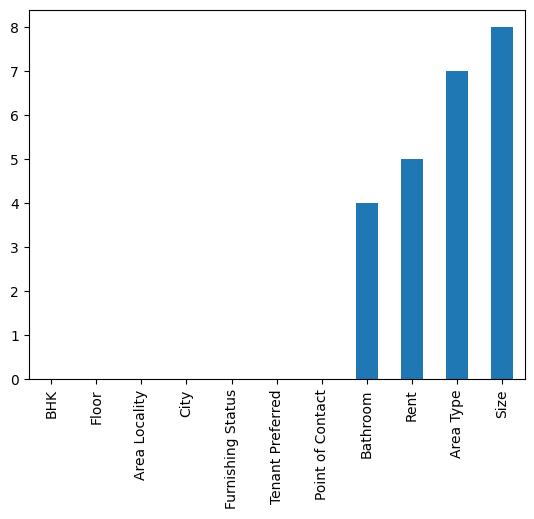

In [9]:
df.isnull().sum().sort_values().plot(kind='bar')

In [10]:
df.shape

(4746, 11)

In [11]:
df.Bathroom.head()

,Bathroom
0,2.0
1,1.0
2,1.0
3,1.0
4,1.0


In [12]:
df.Bathroom.unique()

array([ 2.,  1., nan,  3.,  5.,  4.,  6.,  7., 10.])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BHK                4746 non-null   int64  
 1   Rent               4741 non-null   float64
 2   Size               4738 non-null   float64
 3   Floor              4746 non-null   object 
 4   Area Type          4739 non-null   object 
 5   Area Locality      4746 non-null   object 
 6   City               4746 non-null   object 
 7   Furnishing Status  4746 non-null   object 
 8   Tenant Preferred   4746 non-null   object 
 9   Bathroom           4742 non-null   float64
 10  Point of Contact   4746 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 408.0+ KB


In [14]:
from sklearn.impute import SimpleImputer


In [15]:
impute = SimpleImputer(missing_values=np.nan,
    strategy='median')

In [16]:
df['Bathroom'] = impute.fit_transform(df[['Bathroom']])

In [17]:
impute = SimpleImputer(missing_values=np.nan,
    strategy='mean')
df['Size'] = impute.fit_transform(df[['Size']])

In [18]:
df.isnull().sum()

,0
BHK,0
Rent,5
Size,0
Floor,0
Area Type,7
Area Locality,0
City,0
Furnishing Status,0
Tenant Preferred,0
Bathroom,0


In [19]:
impute = SimpleImputer(missing_values=np.nan,
    strategy='most_frequent')
impute.fit(df[['Area Type']])

SimpleImputer(strategy='most_frequent')

In [20]:
df['Area Type'] =pd.DataFrame(impute.transform(df[['Area Type']]))

In [21]:
df.dropna(inplace=True)

In [22]:
df.isnull().sum().sort_values().sum()

0

In [23]:
df.duplicated().sum()

8

In [24]:
df.drop_duplicates(inplace = True)

In [25]:
df.head()

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000.0,1100.000000,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2.0,Contact Owner
1,2,20000.0,967.936049,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1.0,Contact Owner
2,2,17000.0,1000.000000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1.0,Contact Owner
3,2,10000.0,967.936049,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1.0,Contact Owner
4,2,7500.0,850.000000,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1.0,Contact Owner


In [26]:
cols = list(df.nunique().sort_values().index[:7])
cols

['Area Type',
 'Furnishing Status',
 'Tenant Preferred',
 'Point of Contact',
 'BHK',
 'City',
 'Bathroom']

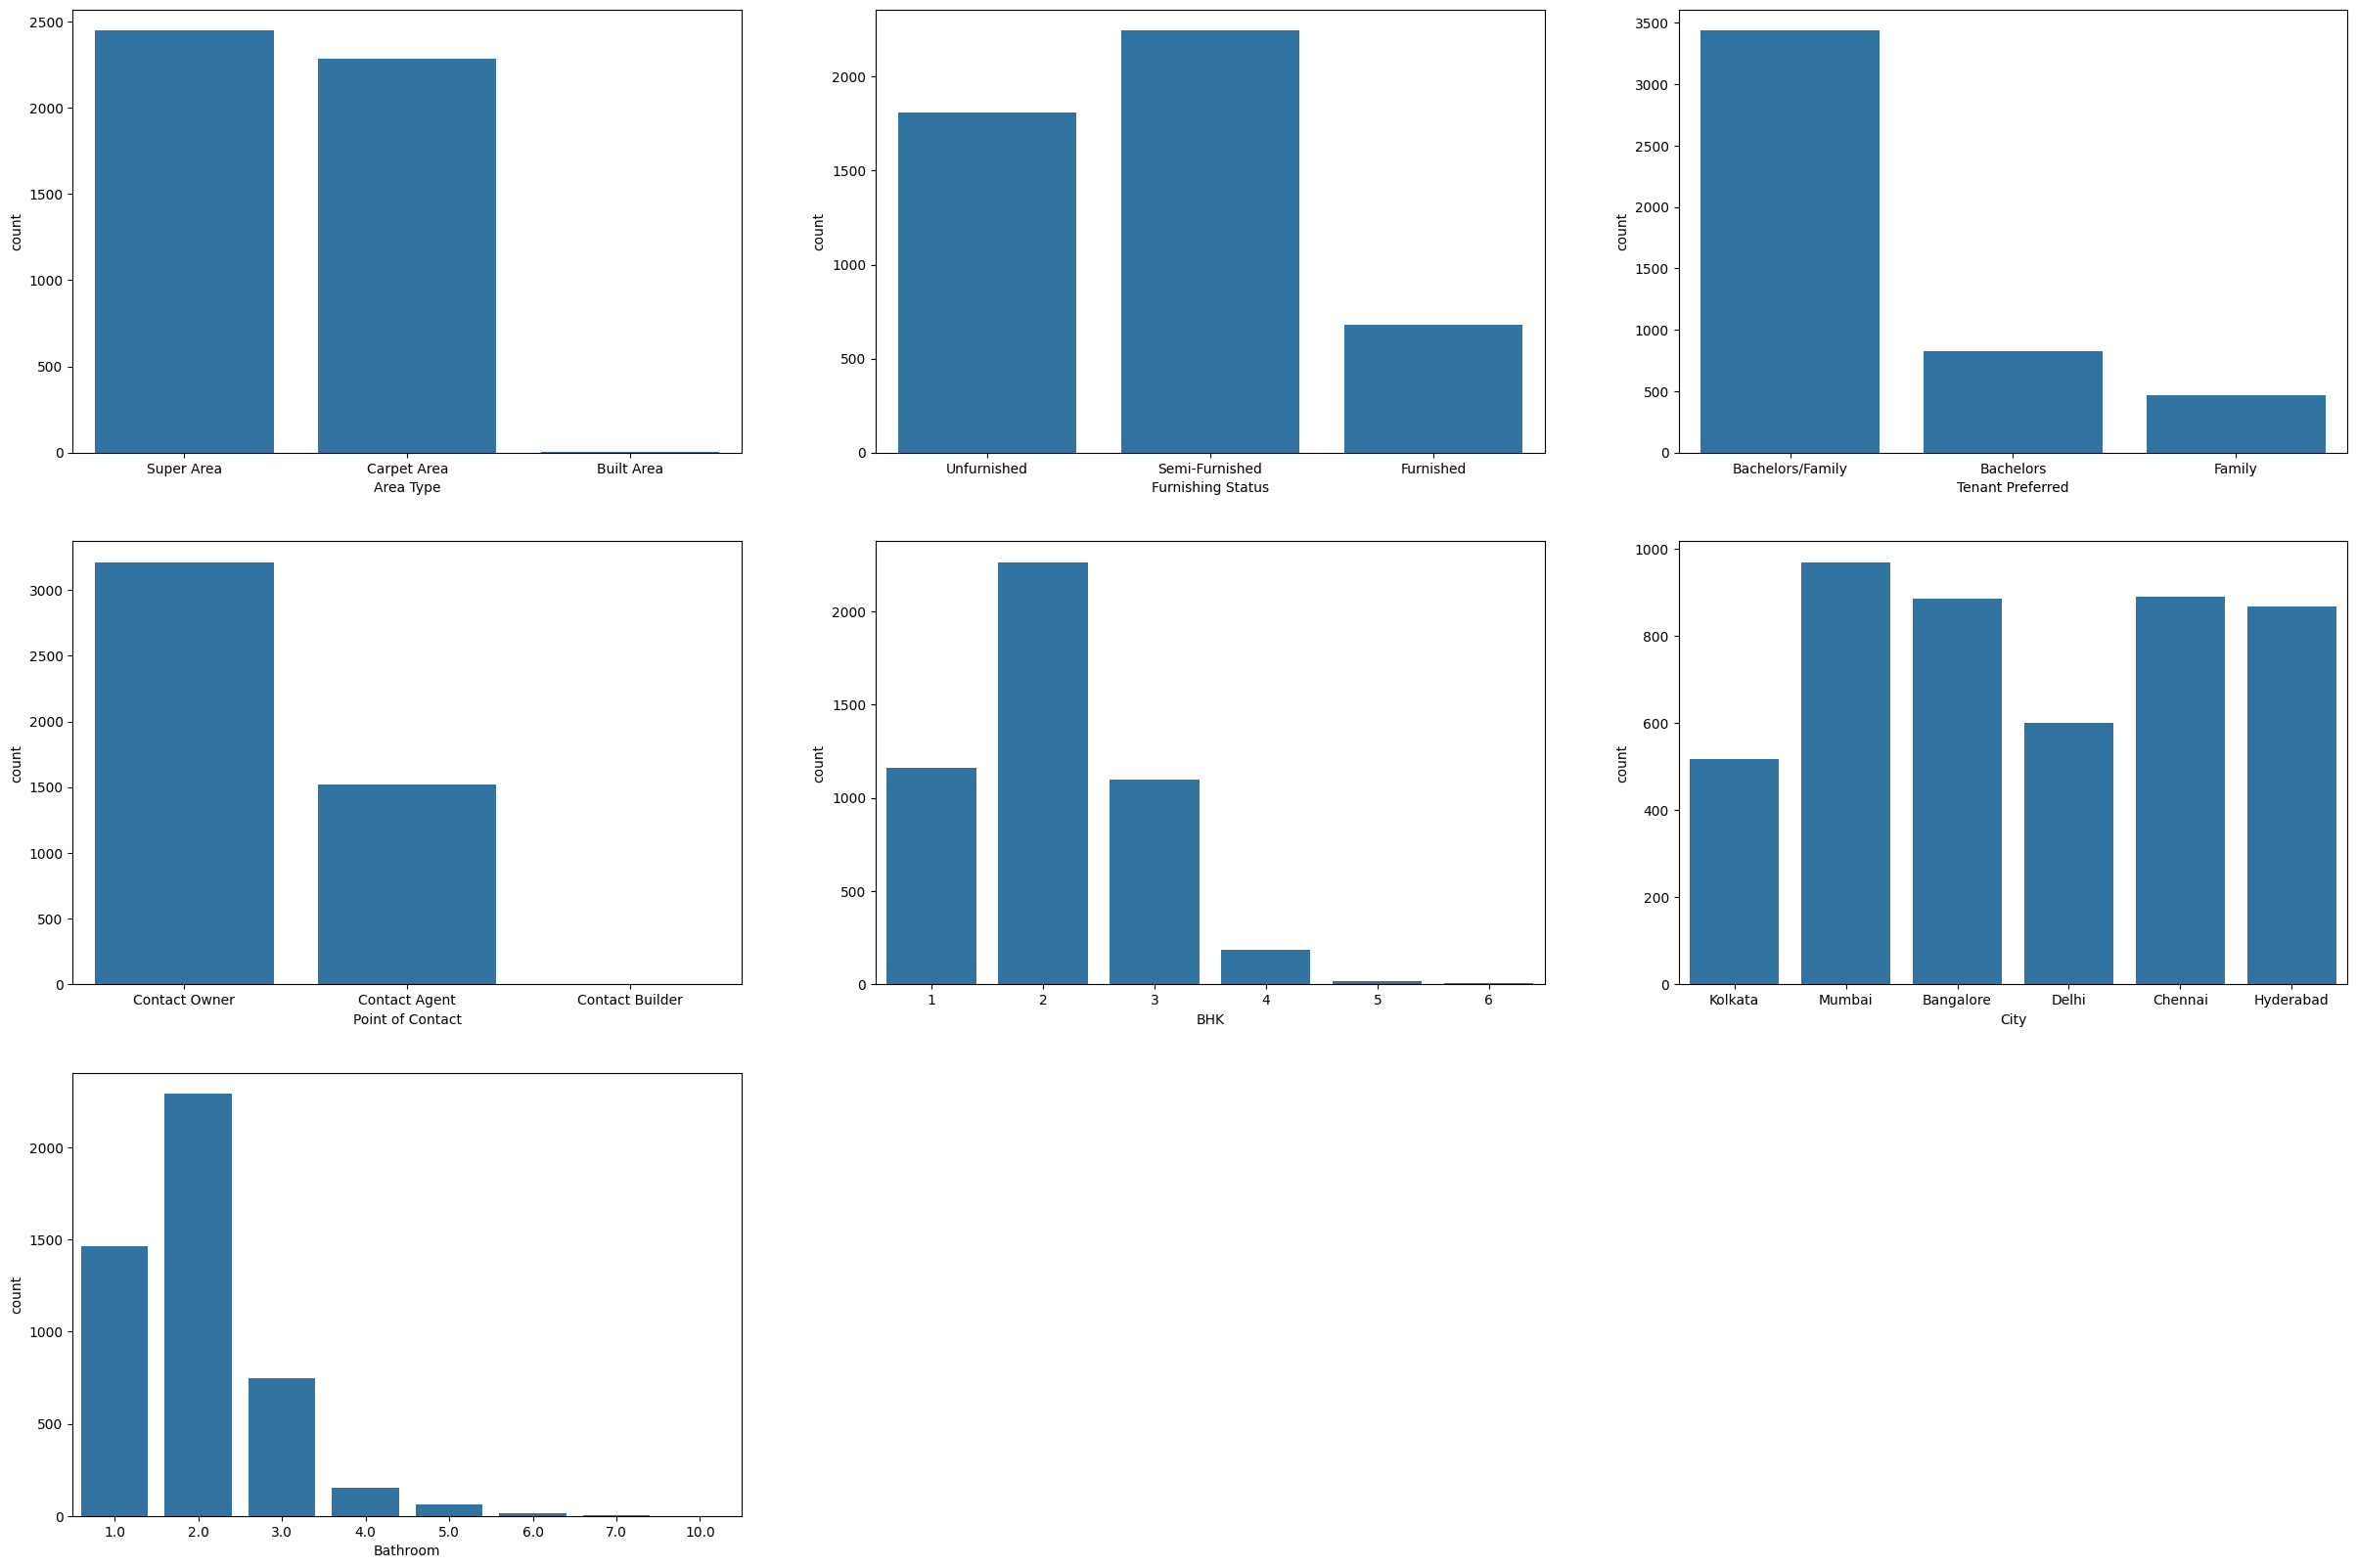

In [27]:
plt.figure(figsize=(30,20))
for n , col in enumerate(cols) :
    plt.subplot(3,3,n+1)
    sns.countplot(data=df,x=col)


In [28]:
cols

['Area Type',
 'Furnishing Status',
 'Tenant Preferred',
 'Point of Contact',
 'BHK',
 'City',
 'Bathroom']

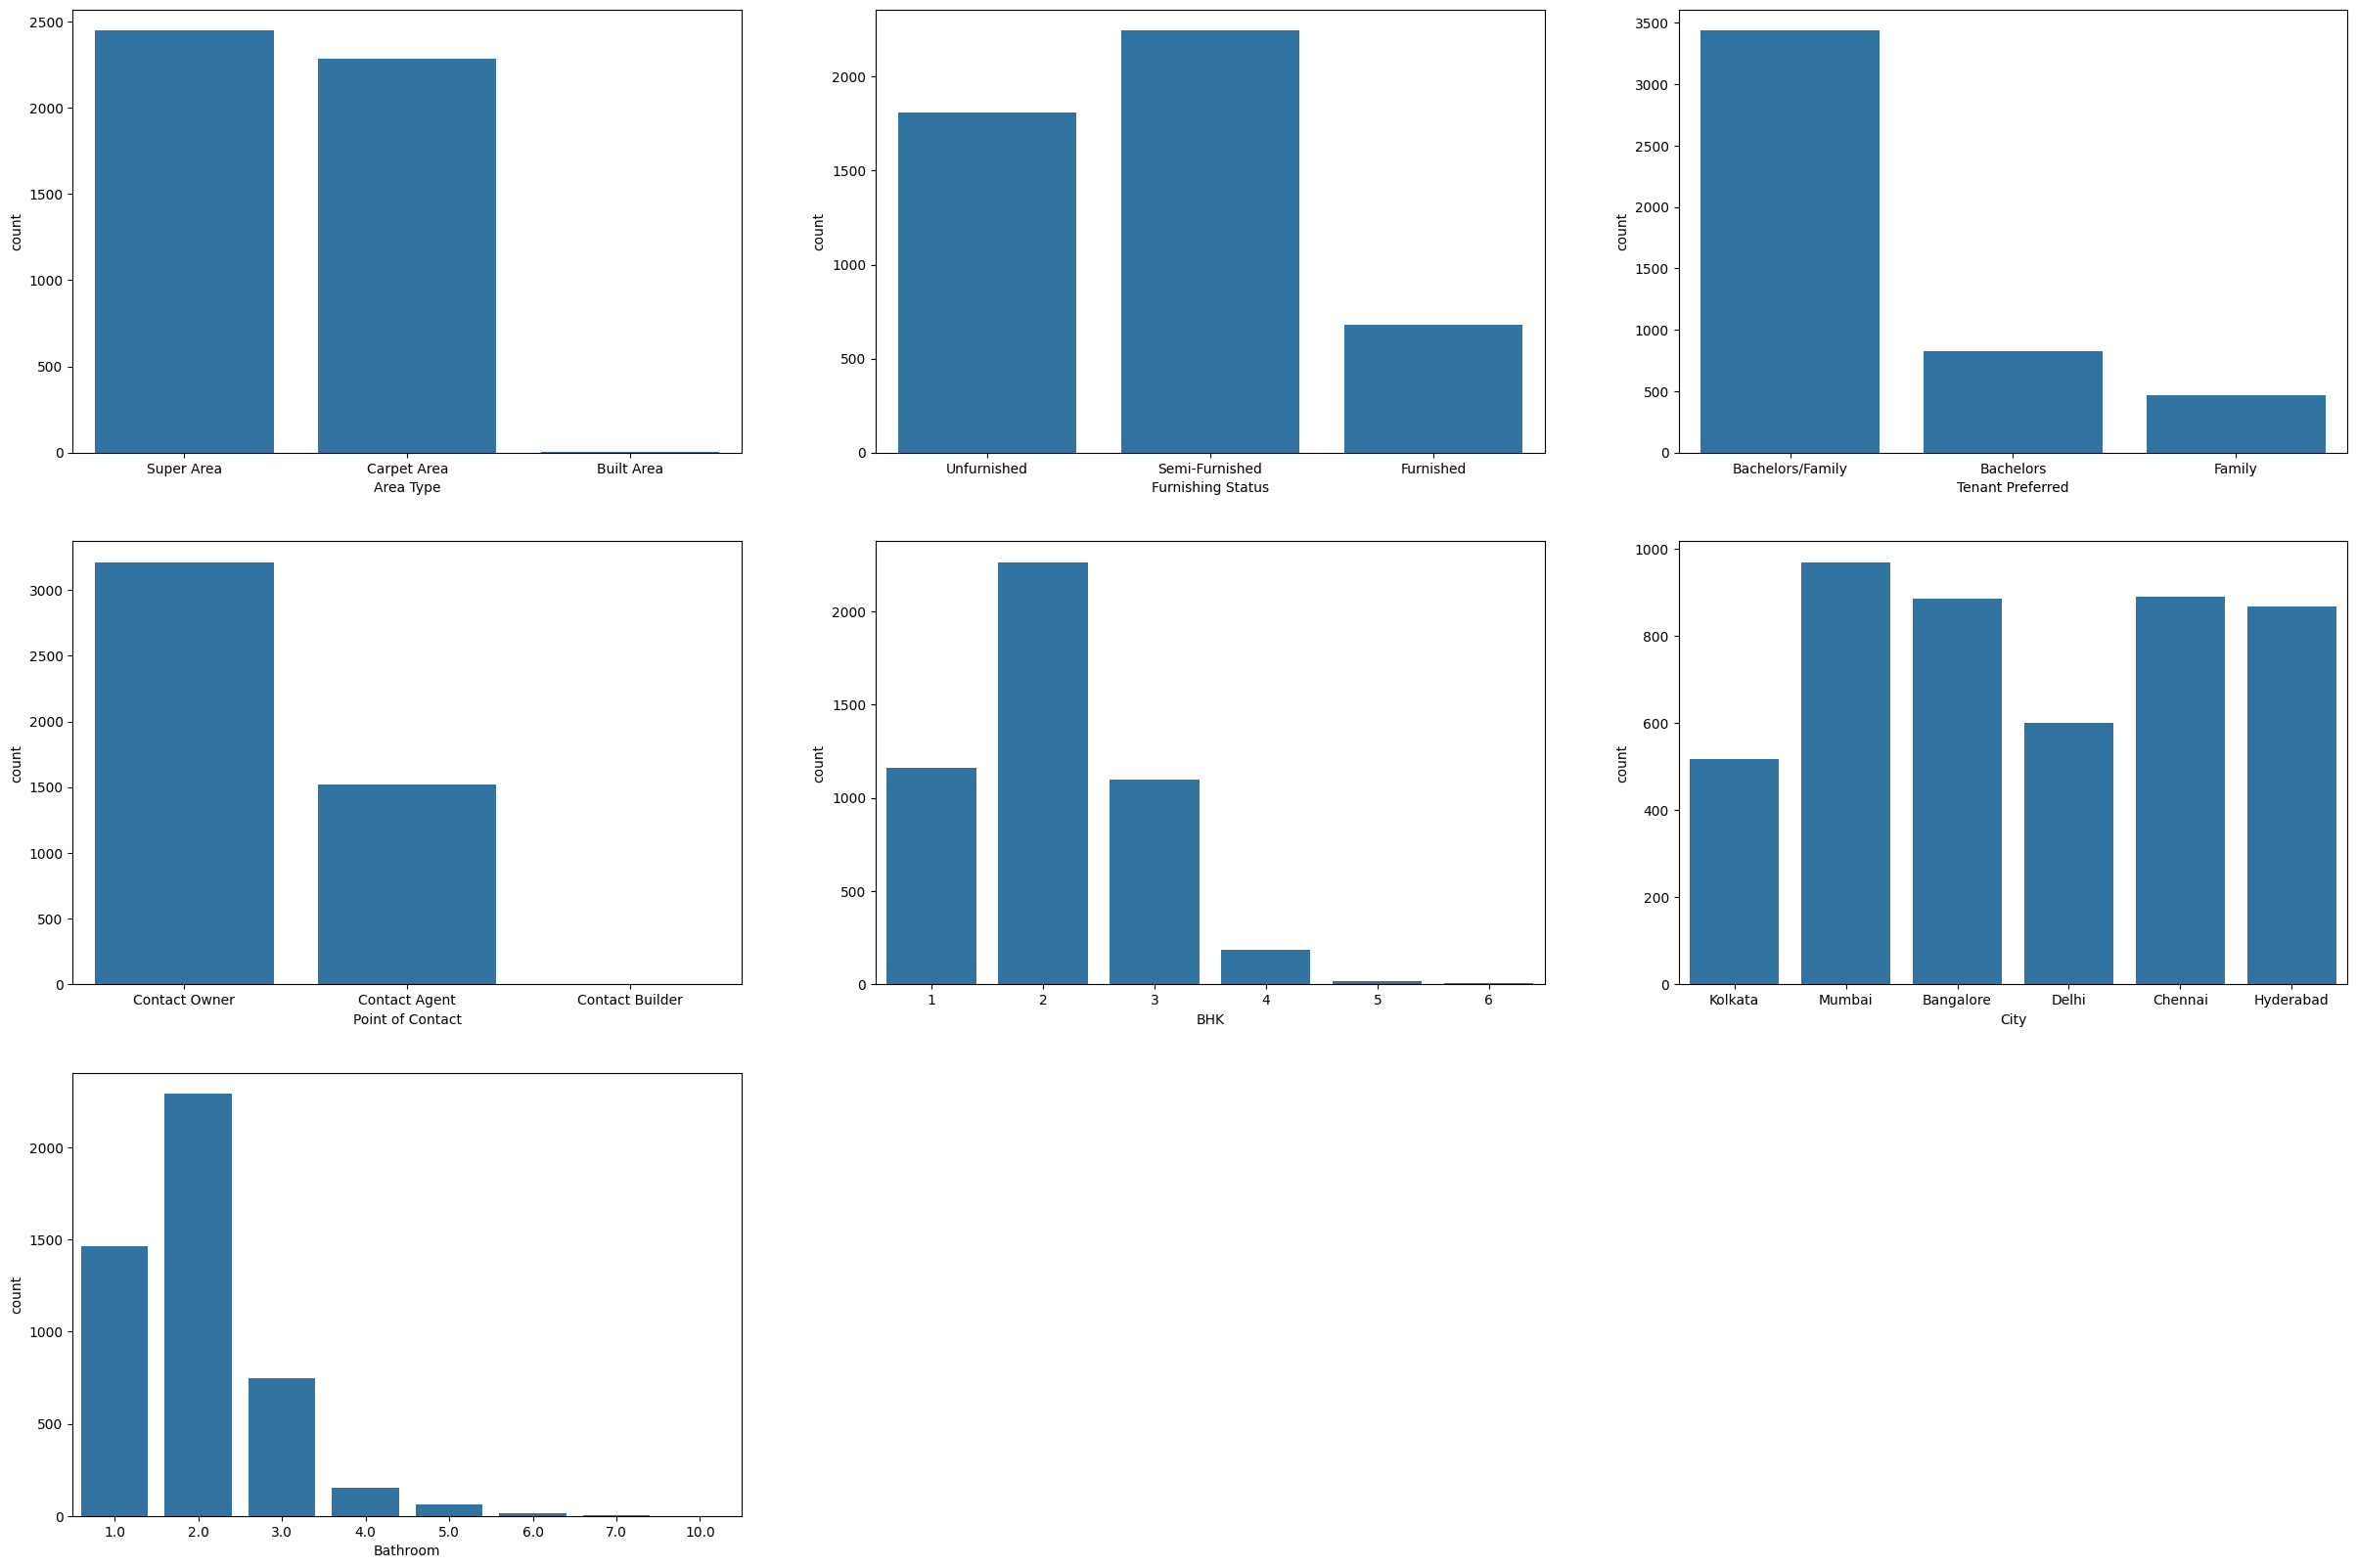

In [29]:
plt.figure(figsize=(30,20))

for n , k in enumerate(cols) :
    plt.subplot(3,3,n+1)
    sns.countplot(data=df,x=k)
    #plt.show()


In [30]:
"""
for col in cols :
    plt.figure(figsize=(30,20))
    print(col)
    for n , k in enumerate(cols) :
        plt.subplot(3,3,n+1)
        sns.countplot(data=df,x=col,hue=k)
    plt.show()
    """

'\nfor col in cols :\n    plt.figure(figsize=(30,20))\n    print(col)\n    for n , k in enumerate(cols) :\n        plt.subplot(3,3,n+1)\n        sns.countplot(data=df,x=col,hue=k)\n    plt.show()\n    '

<Axes: xlabel='Area Type', ylabel='count'>

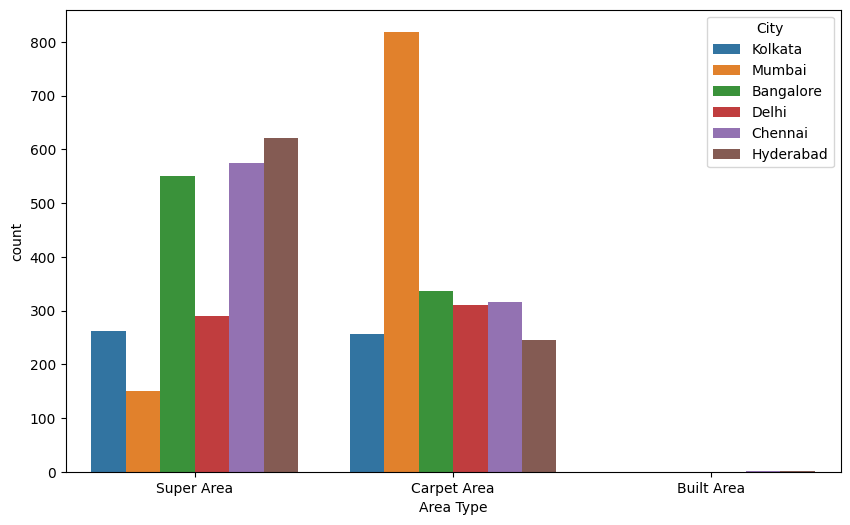

In [31]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Area Type',hue='City')

In [32]:
df.columns

Index(['BHK', 'Rent', 'Size', 'Floor', 'Area Type', 'Area Locality', 'City',
       'Furnishing Status', 'Tenant Preferred', 'Bathroom',
       'Point of Contact'],
      dtype='object')

<Axes: xlabel='BHK', ylabel='count'>

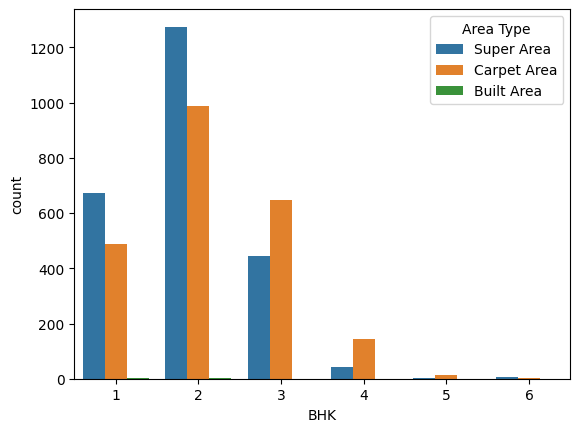

In [33]:
sns.countplot(data=df,x='BHK',hue='Area Type')

In [34]:
df['Bathroom'] = df['Bathroom'].astype(str)

<Axes: xlabel='BHK', ylabel='Size'>

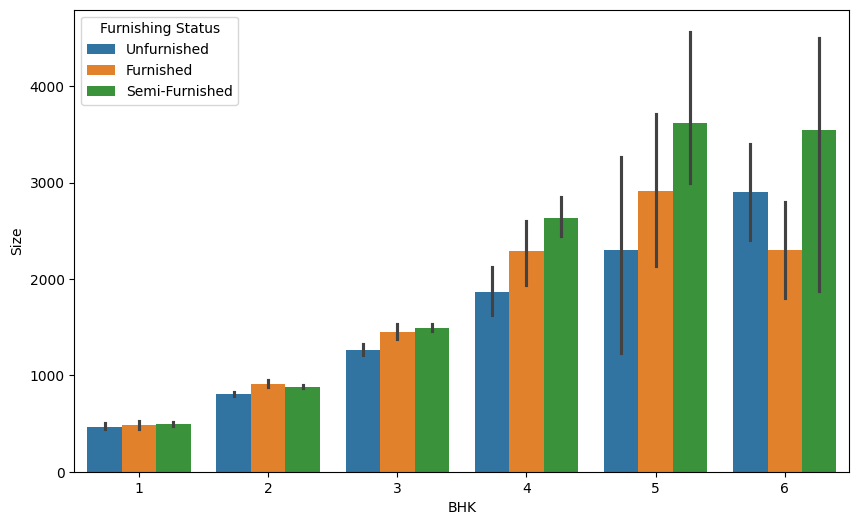

In [35]:
plt.figure(figsize=(10,6))
sns.barplot(data=df,x ='BHK',y='Size',hue='Furnishing Status')

<Axes: xlabel='BHK', ylabel='Rent'>

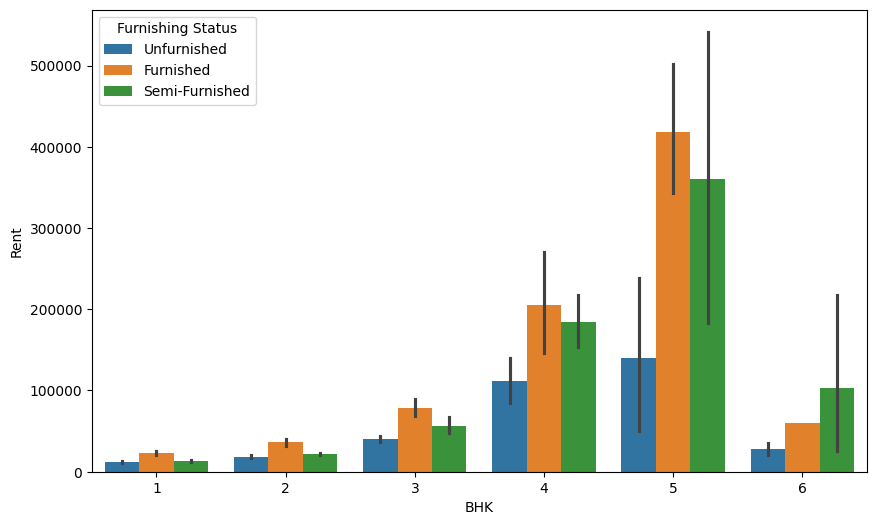

In [36]:
plt.figure(figsize=(10,6))
sns.barplot(data=df,x ='BHK',y='Rent',hue='Furnishing Status')

<Axes: xlabel='Bathroom', ylabel='BHK'>

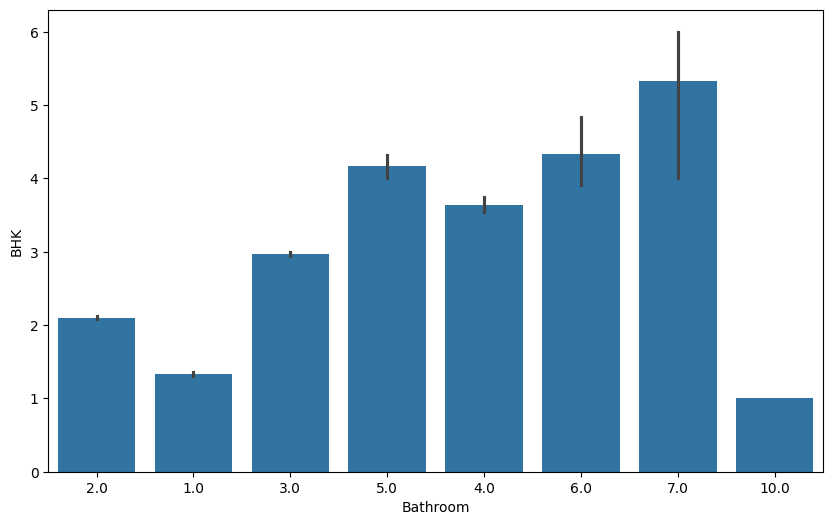

In [37]:
plt.figure(figsize=(10,6))
sns.barplot(data=df,x ='Bathroom',y='BHK',)

<Axes: xlabel='BHK', ylabel='Size'>

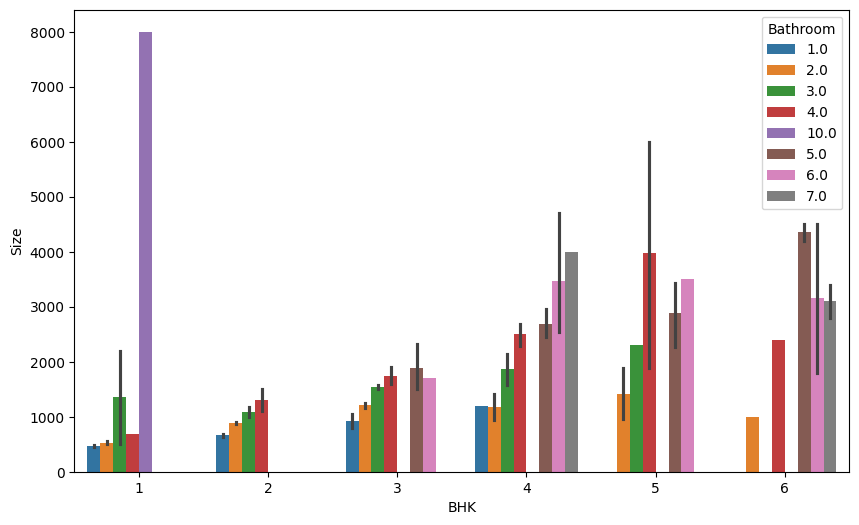

In [38]:
plt.figure(figsize=(10,6))
sns.barplot(data=df,x ='BHK',y='Size',hue='Bathroom')

<Axes: xlabel='Size', ylabel='Count'>

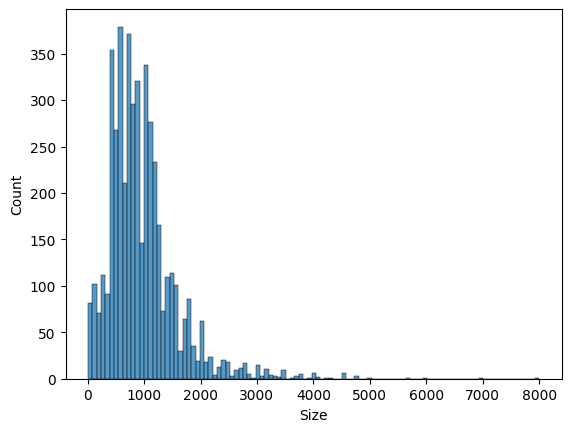

In [39]:
sns.histplot(data=df,x='Size')

<Axes: xlabel='Rent', ylabel='Count'>

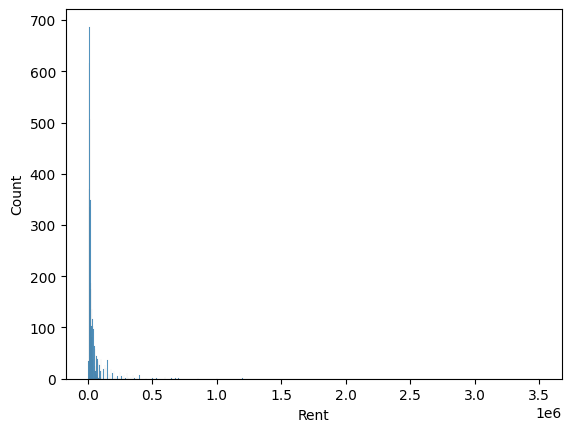

In [40]:
sns.histplot(data=df,x='Rent')

<Axes: xlabel='Size', ylabel='Rent'>

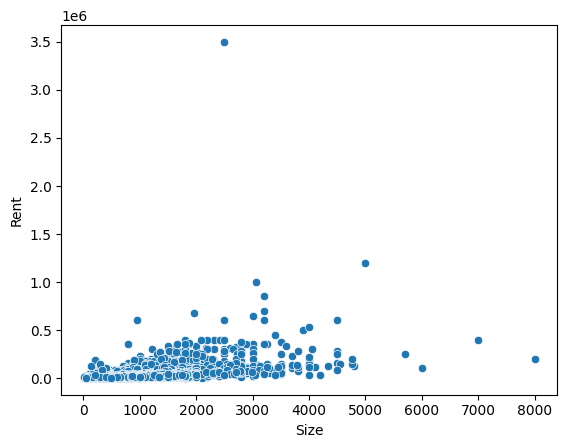

In [41]:
sns.scatterplot(data=df,x='Size',y='Rent')

<Axes: xlabel='Size', ylabel='Rent'>

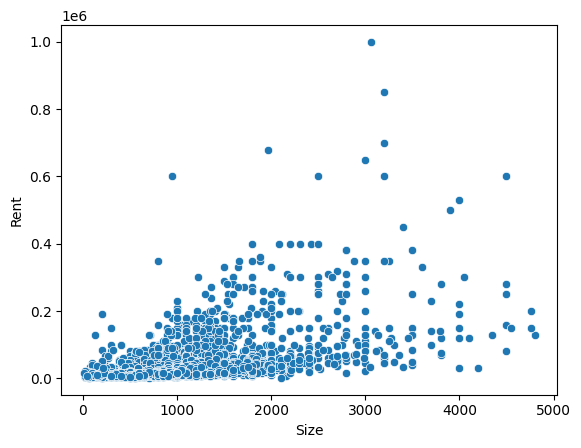

In [42]:
sns.scatterplot(data=df,x=df[df['Size']<5000]['Size'],y=df[df['Rent']<1500000]['Rent'])

<Axes: >

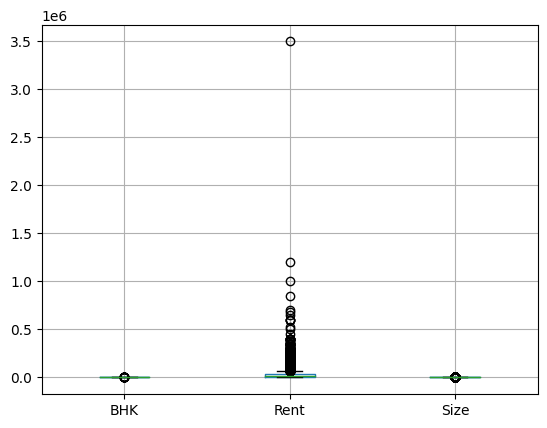

In [43]:
df.boxplot()

In [44]:
df=df[df['Size']<5000]
df=df[df['Rent']<1500000]

In [45]:
df.shape

(4727, 11)

In [46]:
df['Bathroom'] = df['Bathroom'].astype(float)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4727 entries, 0 to 4745
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BHK                4727 non-null   int64  
 1   Rent               4727 non-null   float64
 2   Size               4727 non-null   float64
 3   Floor              4727 non-null   object 
 4   Area Type          4727 non-null   object 
 5   Area Locality      4727 non-null   object 
 6   City               4727 non-null   object 
 7   Furnishing Status  4727 non-null   object 
 8   Tenant Preferred   4727 non-null   object 
 9   Bathroom           4727 non-null   float64
 10  Point of Contact   4727 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 443.2+ KB


# Encoding

In [48]:
cols=df.select_dtypes('object')

In [49]:
cols.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4727 entries, 0 to 4745
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Floor              4727 non-null   object
 1   Area Type          4727 non-null   object
 2   Area Locality      4727 non-null   object
 3   City               4727 non-null   object
 4   Furnishing Status  4727 non-null   object
 5   Tenant Preferred   4727 non-null   object
 6   Point of Contact   4727 non-null   object
dtypes: object(7)
memory usage: 295.4+ KB


In [50]:
cols.nunique()

,0
Floor,479
Area Type,3
Area Locality,2233
City,6
Furnishing Status,3
Tenant Preferred,3
Point of Contact,3


In [51]:
df

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000.0,1100.000000,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2.0,Contact Owner
1,2,20000.0,967.936049,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1.0,Contact Owner
2,2,17000.0,1000.000000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1.0,Contact Owner
3,2,10000.0,967.936049,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1.0,Contact Owner
4,2,7500.0,850.000000,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1.0,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000.0,1000.000000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2.0,Contact Owner
4742,3,29000.0,2000.000000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3.0,Contact Owner
4743,3,35000.0,1750.000000,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3.0,Contact Agent
4744,3,45000.0,1500.000000,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2.0,Contact Agent


In [52]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [53]:
for c in ['Floor','Area Locality','City']:
    lb = LabelEncoder()
    df[c] = lb.fit_transform(df[c])


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4727 entries, 0 to 4745
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BHK                4727 non-null   int64  
 1   Rent               4727 non-null   float64
 2   Size               4727 non-null   float64
 3   Floor              4727 non-null   int64  
 4   Area Type          4727 non-null   object 
 5   Area Locality      4727 non-null   int64  
 6   City               4727 non-null   int64  
 7   Furnishing Status  4727 non-null   object 
 8   Tenant Preferred   4727 non-null   object 
 9   Bathroom           4727 non-null   float64
 10  Point of Contact   4727 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 443.2+ KB


In [55]:
cols=df.select_dtypes('object')
type(cols)

pandas.core.frame.DataFrame

In [56]:
cols.columns

Index(['Area Type', 'Furnishing Status', 'Tenant Preferred',
       'Point of Contact'],
      dtype='object')

In [57]:
'N_'+str(len(df.columns))

'N_11'

In [58]:
df.head()

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000.0,1100.000000,454,Super Area,220,4,Unfurnished,Bachelors/Family,2.0,Contact Owner
1,2,20000.0,967.936049,14,Super Area,1525,4,Semi-Furnished,Bachelors/Family,1.0,Contact Owner
2,2,17000.0,1000.000000,14,Super Area,1758,4,Semi-Furnished,Bachelors/Family,1.0,Contact Owner
3,2,10000.0,967.936049,10,Super Area,525,4,Unfurnished,Bachelors/Family,1.0,Contact Owner
4,2,7500.0,850.000000,10,Carpet Area,1888,4,Unfurnished,Bachelors,1.0,Contact Owner


In [59]:
for c in list(cols.columns) :
    print(c)
    onehotencoder=OneHotEncoder()
    swap = onehotencoder.fit_transform(np.array(df[c]).reshape(-1,1)).toarray()
    for i in range(swap.shape[1]):
        df['N_'+str(len(df.columns))] = swap[:,i]

Area Type
Furnishing Status
Tenant Preferred
Point of Contact


In [60]:
df.drop(list(cols.columns),axis =1,inplace = True)

In [61]:
df.head()

,BHK,Rent,Size,Floor,Area Locality,City,Bathroom,N_11,N_12,N_13,N_14,N_15,N_16,N_17,N_18,N_19,N_20,N_21,N_22
0,2,10000.0,1100.000000,454,220,4,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,2,20000.0,967.936049,14,1525,4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,2,17000.0,1000.000000,14,1758,4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,2,10000.0,967.936049,10,525,4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,2,7500.0,850.000000,10,1888,4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4727 entries, 0 to 4745
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BHK            4727 non-null   int64  
 1   Rent           4727 non-null   float64
 2   Size           4727 non-null   float64
 3   Floor          4727 non-null   int64  
 4   Area Locality  4727 non-null   int64  
 5   City           4727 non-null   int64  
 6   Bathroom       4727 non-null   float64
 7   N_11           4727 non-null   float64
 8   N_12           4727 non-null   float64
 9   N_13           4727 non-null   float64
 10  N_14           4727 non-null   float64
 11  N_15           4727 non-null   float64
 12  N_16           4727 non-null   float64
 13  N_17           4727 non-null   float64
 14  N_18           4727 non-null   float64
 15  N_19           4727 non-null   float64
 16  N_20           4727 non-null   float64
 17  N_21           4727 non-null   float64
 18  N_22         

In [63]:
X = df.drop(['Rent'],axis =1)

In [64]:
X.head()

,BHK,Size,Floor,Area Locality,City,Bathroom,N_11,N_12,N_13,N_14,N_15,N_16,N_17,N_18,N_19,N_20,N_21,N_22
0,2,1100.000000,454,220,4,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,2,967.936049,14,1525,4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,2,1000.000000,14,1758,4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,2,967.936049,10,525,4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,2,850.000000,10,1888,4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [65]:
y = df['Rent']

In [66]:
y.head()

,Rent
0,10000.0
1,20000.0
2,17000.0
3,10000.0
4,7500.0


# Scaling

In [67]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler

In [68]:
scaler = RobustScaler()
X_scaler = scaler.fit_transform(X)

In [69]:
X_scaler

array([[ 0.        ,  0.38610039,  0.73837209, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.18214062, -0.54069767, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.23166023, -0.54069767, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.        ,  1.38996139,  0.20348837, ...,  1.        ,
         0.        , -1.        ],
       [ 1.        ,  1.003861  ,  0.0755814 , ...,  1.        ,
         0.        , -1.        ],
       [ 0.        ,  0.23166023,  0.3255814 , ...,  0.        ,
         0.        ,  0.        ]])

# **Split Data**

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True)

In [73]:
type(X_train)

pandas.core.frame.DataFrame

In [74]:
X_train.shape , y_test.shape

((3781, 18), (946,))

# Linear Regression

In [80]:
from sklearn.linear_model import LinearRegression , Lasso , Ridge

In [81]:
LR=LinearRegression()

In [ ]:
# Lr_las=Lasso()

In [83]:
LR.fit(X_train,y_train)

LinearRegression()

In [84]:
LR.coef_

array([ 1.48318538e+02,  2.26527338e+01, -1.64050699e+00, -1.32833146e+00,
        6.39430772e+03,  2.01368499e+04,  5.19158044e+03,  1.60878118e+02,
       -5.35245855e+03,  7.66020205e+03, -3.07053957e+03, -4.58966248e+03,
       -2.42472014e+03,  4.36388536e+03, -1.93916522e+03,  1.21393273e+04,
        0.00000000e+00, -1.21393273e+04])

In [85]:
LR.intercept_

-34651.69580598809

In [169]:
y_predict=LR.predict(X_test)
# y_predict
type(y_predict)
actual_data=pd.Series(y_predict)
# actual_data.head()

,0
0,50739.829017
1,91086.057410
2,-23923.055848
3,30924.022360
4,29697.081684


In [165]:
y_measure=LR.predict(X_train)
Train_data=pd.Series(y_measure)

In [182]:
Edf=pd.DataFrame([actual_data,y_measure]).transpose()
Edf.columns=['actual_data', 'y_measure']
Edf.index.rename='Sample'
Edf.head()

,actual_data,y_measure
0,50739.829017,150929.356482
1,91086.057410,96828.219324
2,-23923.055848,3581.983949
3,30924.022360,-3751.970593
4,29697.081684,10249.861584


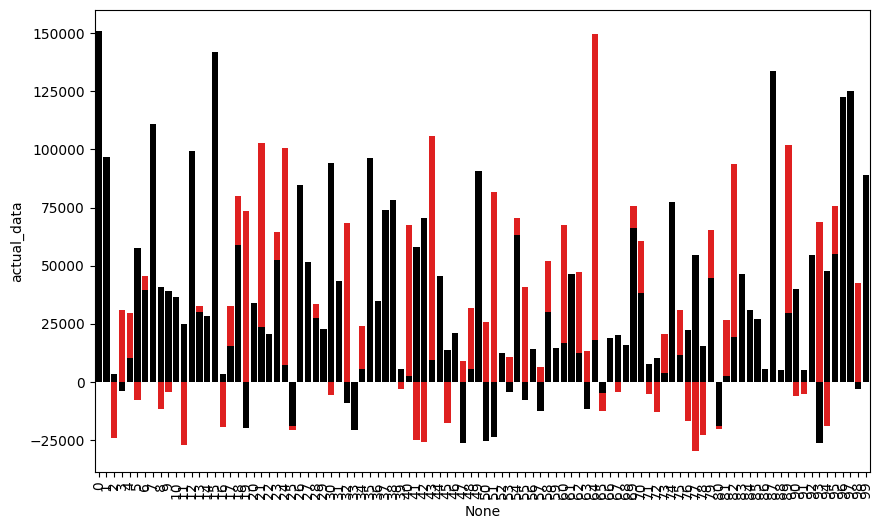

In [200]:
plt.figure(figsize=(10, 6))
sns.barplot(data=Edf[0:100] , y= Edf['actual_data'][0:100], x=Edf.index[0:100],
              color='r')
sns.barplot(data=Edf[0:100] , y= Edf['y_measure'][0:100], x=Edf.index[0:100],
              color='k')
plt.xticks(rotation=90)
plt.show()

In [87]:
LR.score(X_train,y_train)

0.456649962113306

In [88]:
LR.score(X_test,y_test)

0.474780702146098

In [ ]:
# from sklearn.metrics import mean_squared_error , least_sq